In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm
from datetime import datetime,timedelta
import random
from pygeocoder import Geocoder
import folium
import branca.colormap as cmp

In [2]:
def git_hello():
    print('Hello Git')
    print('Where is my push?')
git_hello()

Hello Git
Where is my push?


In [2]:
df_FC_In  = pd.read_csv('E:\Data\divvy\EDA/Nbh_IN_forecastability.csv' ,index_col=0)
df_FC_Out = pd.read_csv('E:\Data\divvy\EDA/Nbh_OUT_forecastability.csv',index_col=0)

In [3]:
#Large,Caution
df_ts_in_1721 = pd.read_csv('E:\Data\divvy/df_ts_in_1721_full.csv',parse_dates=['time_stamp'])
df_ts_out_1721= pd.read_csv('E:\Data\divvy/df_ts_out_1721_full.csv',parse_dates=['time_stamp'])

In [2]:
df_station = pd.read_csv('E:\Data\divvy/df_station_1721_FINAL.csv',index_col=0)

In [10]:
df_FC_In

,Nbh_row,Nbh_id,ADI,CV2,Forecastability
1,1,1.0,1.321956,1.504304,Lumpy
2,2,1.1,2.370006,2.884210,Lumpy
3,3,2.0,4.619901,5.291060,Lumpy
4,4,2.1,9.540523,10.321384,Lumpy
5,5,2.3,7.573455,8.203588,Lumpy
...,...,...,...,...,...
165,165,77.0,2.229014,2.750419,Lumpy
166,166,77.1,1.758824,2.289547,Lumpy
167,167,77.2,2.762890,4.574981,Lumpy
168,168,77.3,3.617227,4.434217,Lumpy


In [15]:
df_station = df_station.merge(df_FC_In,on='Nbh_id')

In [16]:
df_station

,station_name,lng,lat,Docks in Service,Nbh_id,com_id,date_begin,date_end,Nbh_row,ADI,CV2,Forecastability
0,2112 W Peterson Ave,-87.683593,41.991181,11.0,2.4,2.0,NaN,NaN,6,5.393218,6.124525,Lumpy
1,Clark St & Elmdale Ave,-87.669762,41.990683,13.0,2.4,2.0,NaN,NaN,6,5.393218,6.124525,Lumpy
2,351,-87.606611,41.803023,15.0,39.1,39.0,NaN,NaN,114,3.326658,3.843092,Lumpy
3,Cottage Grove Ave & 43rd St,-87.606587,41.816495,11.0,39.1,39.0,NaN,NaN,114,3.326658,3.843092,Lumpy
4,Cottage Grove Ave & 47th St,-87.606764,41.809857,13.0,39.1,39.0,NaN,NaN,114,3.326658,3.843092,Lumpy
...,...,...,...,...,...,...,...,...,...,...,...,...
822,Wentworth Ave & Cermak Rd,-87.631695,41.853077,17.0,3.4,3.0,2020-06-03,NaN,11,3.645452,4.719925,Lumpy
823,Wentworth Ave & Cermak Rd (Temp),-87.631474,41.853059,19.0,3.4,3.0,2018-01-01,2020-06-04,11,3.645452,4.719925,Lumpy
824,Wallace St & 35th St,-87.641292,41.830621,13.0,34.2,34.0,NaN,NaN,101,6.902124,7.322397,Lumpy
825,Western Ave & 104th St,-87.662560,41.704878,15.0,72.2,72.0,2020-10-06,NaN,158,inf,NaN,Lumpy


In [19]:
df_station.Forecastability.value_counts()

Lumpy      658
Erratic    169
Name: Forecastability, dtype: int64

In [18]:
CHICAGO_COORDINATES = (41.864073, -87.706819)
# for speed purposes
MAX_RECORDS = 100

# create empty map zoomed in on San Francisco
map = folium.Map(location=CHICAGO_COORDINATES, zoom_start=11)

In [20]:
def colormap(Forecastability):
    return {'Lumpy':'red','Erratic':'green'}[Forecastability]

In [21]:
# add a marker for every record in the filtered data
for idx,row in df_station.iterrows():
    folium.Circle(
        location = (row['lat'],row['lng']),
        radius = 2,
        color = colormap(row['Forecastability'])
        ).add_to(map)
#map.add_child(colormap)
display(map)

### Visualizing Divvy Station deployment

In [45]:
df_station.date_begin = df_station.date_begin.fillna('2016-01-01')

In [46]:
df_station.insert(0,'station_age', df_station.date_begin_filled.apply(lambda x:(datetime.now() - datetime.strptime(x, "%Y-%m-%d")).days))

In [47]:
df_station

,station_age,station_name,lng,lat,Docks in Service,Nbh_id,com_id,date_begin,date_end,Nbh_row,ADI,CV2,Forecastability
0,2328,2112 W Peterson Ave,-87.683593,41.991181,11.0,2.4,2.0,2016-01-01,NaN,6,5.393218,6.124525,Lumpy
1,2328,Clark St & Elmdale Ave,-87.669762,41.990683,13.0,2.4,2.0,2016-01-01,NaN,6,5.393218,6.124525,Lumpy
2,2328,351,-87.606611,41.803023,15.0,39.1,39.0,2016-01-01,NaN,114,3.326658,3.843092,Lumpy
3,2328,Cottage Grove Ave & 43rd St,-87.606587,41.816495,11.0,39.1,39.0,2016-01-01,NaN,114,3.326658,3.843092,Lumpy
4,2328,Cottage Grove Ave & 47th St,-87.606764,41.809857,13.0,39.1,39.0,2016-01-01,NaN,114,3.326658,3.843092,Lumpy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,713,Wentworth Ave & Cermak Rd,-87.631695,41.853077,17.0,3.4,3.0,2020-06-03,NaN,11,3.645452,4.719925,Lumpy
823,1597,Wentworth Ave & Cermak Rd (Temp),-87.631474,41.853059,19.0,3.4,3.0,2018-01-01,2020-06-04,11,3.645452,4.719925,Lumpy
824,2328,Wallace St & 35th St,-87.641292,41.830621,13.0,34.2,34.0,2016-01-01,NaN,101,6.902124,7.322397,Lumpy
825,588,Western Ave & 104th St,-87.662560,41.704878,15.0,72.2,72.0,2020-10-06,NaN,158,inf,NaN,Lumpy


In [68]:
# create empty map zoomed in on San Francisco
map2 = folium.Map(location=CHICAGO_COORDINATES, zoom_start=11)
####
colormap2 = cmp.StepColormap(
 eval(sns.color_palette('rocket').as_hex().__str__()),
 vmin=df_station['station_age'].min(), vmax=df_station['station_age'].max(),
  #for change in the colors, not used fr linear
 caption='Color Scale for Map'    #Caption for Color scale or Legend
)
colormap2


In [69]:
# add a marker for every record in the filtered data
for idx,row in df_station.iterrows():
    folium.Circle(
        location = (row['lat'],row['lng']),
        radius = 2,
        color = colormap2(row['station_age'])
        ).add_to(map2)

In [ ]:
map2.add_child(colormap2,name='Age of station (days)')
display(map2)

### Forecastability Evaluation

In [6]:
df_ts_in_1721.head()

,time_stamp,Keeler Ave & Roosevelt Rd,East End Ave & 87th St,NA,Greenwood Ave & 91st St,Big Marsh Park,Kildare Ave & 26th St,Lockwood Ave & Wrightwood Ave,N Clark St & W Elm St,Major Taylor Trail & 124th St,...,Clinton St & Tilden St,California Ave & 21st St,Racine Ave & Wrightwood Ave,Canal St & Adams St,Halsted St & 35th St (*),Manor Ave & Leland Ave,Broadway & Belmont Ave,Cannon Dr & Fullerton Ave,Logan Blvd & Elston Ave,Kosciuszko Park
0,2017-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 00:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_ts_in_1721 = df_ts_in_1721.T

In [37]:

df_ts_in_1721.shape[1] / (df_ts_in_1721.sample(20) == 0).sum(axis=1)

119081    1.011962
158058    1.056180
17677     1.160494
89562     1.058824
36341     1.065491
213730    1.003559
237530    1.155738
199626    1.015606
26456     1.215517
130419    1.168508
11668     1.002370
240437    1.305556
59343     1.002370
225024    1.178273
229754    1.081841
31927     1.347134
231143    1.007143
116474    1.035496
144235    1.132530
208749    1.102999
dtype: float64

In [8]:
#ts_sample = df_ts_in_1721[list(old_stations)[10:20]]#[df_ts_in_1721.columns[2:10]]
def Forecastability_Analysis(ts_sample):
    ##Calculating ADI
    adi = ts_sample.shape[0] / (ts_sample != 0).sum(axis=0)
    #Calculating CV2
    avg_ = np.average(ts_sample,axis=0)
    std_ = np.std(ts_sample,axis=0).values
    cv2 = (std_/avg_)**2
    #Return output 
    out_dct = {'stations':list(ts_sample.columns),'ADI':adi,'CV2':cv2}
    temp_ = pd.DataFrame(out_dct).reset_index(drop=True)
    temp_.insert(temp_.shape[1],'forecastability', (temp_.ADI < 1.32).apply(lambda x:str(1*x)) + (temp_.CV2 < 0.49).apply(lambda x:str(1*x)))
    f_mapper = {'11':'Smooth','10':'Erratic','01':'Intermittent','00':'Lumpy'}
    temp_.forecastability = temp_.forecastability.apply(lambda x:f_mapper[x])
    return temp_

In [106]:
temp_ = Forecastability_Analysis(df_ts_in_1721.set_index('time_stamp',drop=True))
temp_

,stations,ADI,CV2,forecastability
0,Keeler Ave & Roosevelt Rd,27275.333333,27274.333333,Lumpy
1,East End Ave & 87th St,1515.296296,1592.150892,Lumpy
2,NA,5.117857,10.266827,Lumpy
3,Greenwood Ave & 91st St,3457.436620,3981.877231,Lumpy
4,Big Marsh Park,1095.883929,1371.607731,Lumpy
...,...,...,...,...
840,Manor Ave & Leland Ave,41.854731,45.061260,Lumpy
841,Broadway & Belmont Ave,5.960953,7.325389,Lumpy
842,Cannon Dr & Fullerton Ave,12.313920,16.966171,Lumpy
843,Logan Blvd & Elston Ave,12.482355,13.782461,Lumpy


In [5]:
# df_ts_in_1721_T = df_ts_in_1721.set_index('time_stamp',drop=True).T
# df_station.set_index('station_name',drop=True,inplace=True)
# df_ts_in_1721_T = df_ts_in_1721_T.join(df_station[['Nbh_id']],how='left')
# df_ts_in_1721_T.groupby('Nbh_id').sum().T.to_csv('E:\Data\divvy/df_nbhIN_1721_full.csv')
df_Nbh_IN = pd.read_csv('E:\Data\divvy/df_nbhIN_1721_full.csv',index_col=0)

In [6]:
df_Nbh_IN

,1.0,1.1,2.0,2.1,2.3,2.4,3.0,3.1,3.2,3.3,...,73.1,74.0,74.1,75.0,75.2,77.0,77.1,77.2,77.3,77.4
2017-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:40:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01 16:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-01 16:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-01 16:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-01 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
nbh_in_result = Forecastability_Analysis(df_Nbh_IN)

In [12]:
nbh_in_result.forecastability.value_counts()

Lumpy    171
Name: forecastability, dtype: int64

In [13]:
nbh_in_result.describe()

,ADI,CV2
count,171.000000,171.000000
mean,603.966669,705.757423
std,2072.659288,2420.113054
min,1.469048,1.856164
25%,3.483547,4.474815
50%,15.013945,17.357360
75%,130.266879,158.210263
max,15342.375000,17898.437500


### Further Aggregate up By comminity

In [16]:
df_Nbh_IN_temp = df_Nbh_IN.T.reset_index()

In [20]:
df_Nbh_IN_temp.insert(0,'community',df_Nbh_IN_temp['index'].apply(lambda x:x.split('.')[0]))

In [25]:
df_COM_IN_temp = df_Nbh_IN_temp.set_index('index').groupby('community').sum()

In [30]:
COM_in_result = Forecastability_Analysis(df_COM_IN_temp.T)

In [31]:
COM_in_result.forecastability.value_counts()

Lumpy      58
Erratic     4
Name: forecastability, dtype: int64

### Testing Hourly level Aggregation

In [44]:
df_COM_IN_temp_Hour = df_COM_IN_temp.T.reset_index()
df_COM_IN_temp_Hour.insert(0,'Hour',df_COM_IN_temp_Hour['index'].apply(lambda x:datetime.strptime(x.split(':')[0]+':00:00',"%Y-%m-%d %H:%M:%S")))

In [48]:
df_COM_IN_temp_Hour = df_COM_IN_temp_Hour.set_index('index',drop=True).groupby('Hour').sum()

In [49]:
COM_in_HOUR_result = Forecastability_Analysis(df_COM_IN_temp_Hour)

In [50]:
COM_in_HOUR_result.forecastability.value_counts()

Lumpy      46
Erratic    16
Name: forecastability, dtype: int64

In [52]:
COM_in_HOUR_result.describe()

,ADI,CV2
count,62.000000,62.000000
mean,134.643312,161.189444
std,460.722795,546.920880
min,1.051666,1.306216
25%,1.301908,2.106662
50%,5.043201,5.629485
75%,28.441111,36.289512
max,2557.125000,2982.312500


<AxesSubplot:>

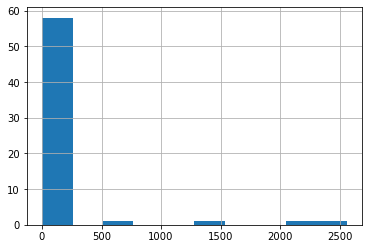

In [54]:
COM_in_HOUR_result.ADI.hist()

<AxesSubplot:>

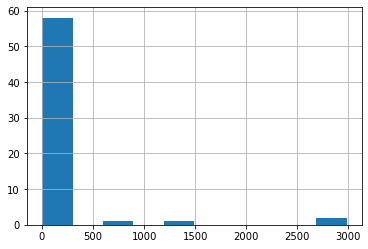

In [58]:
COM_in_HOUR_result.CV2.hist()

<AxesSubplot:xlabel='Hour'>

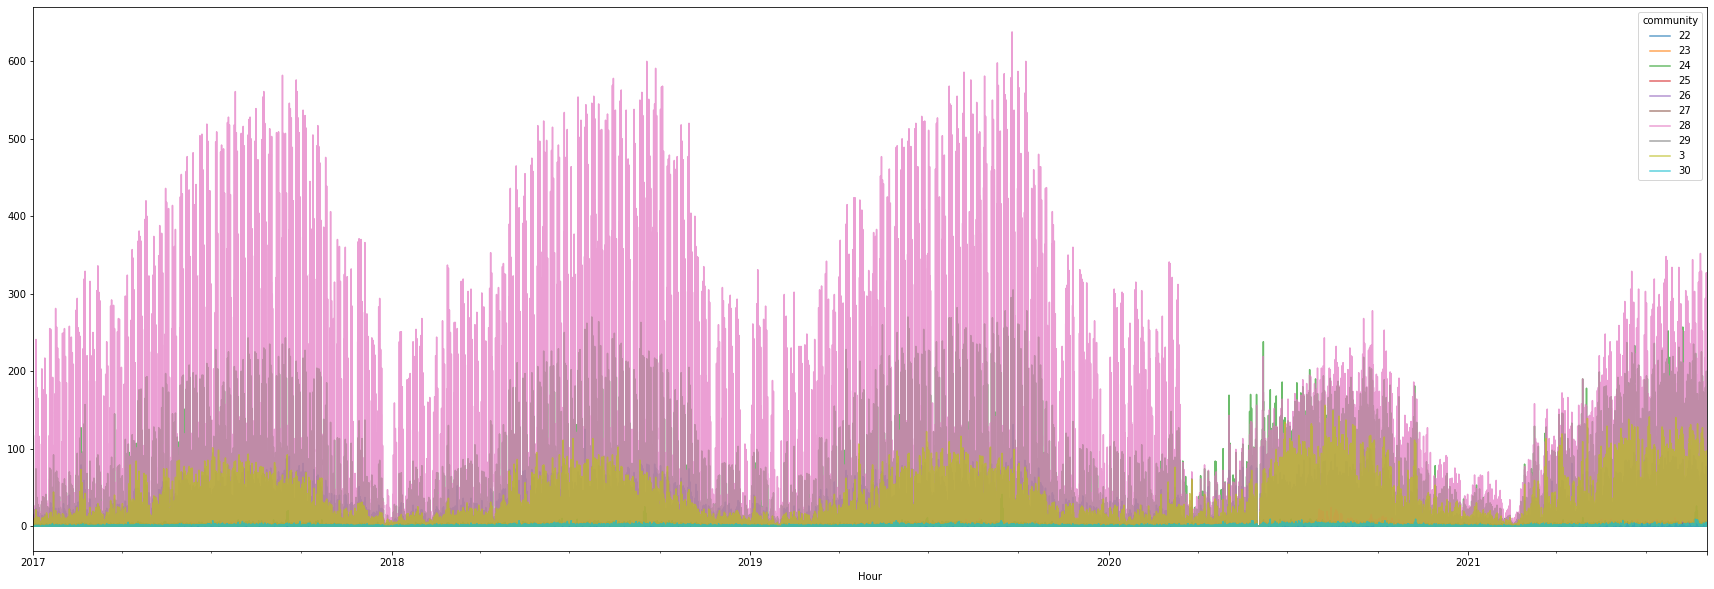

In [66]:
df_COM_IN_temp_Hour[df_COM_IN_temp_Hour.columns[10:20]].plot(figsize=(30,10),alpha=0.7)

### Visualizing Forecastability on the MAP

In [70]:
COM_in_HOUR_result = COM_in_HOUR_result.rename({'stations':'com_id'},axis=1)

In [77]:
df_station.dropna(subset ='com_id',inplace=True)

In [78]:
df_station.com_id = df_station.com_id.apply(lambda x:str(int(x)))

In [79]:
df_station = df_station.merge(COM_in_HOUR_result,on='com_id')

In [80]:
df_station

,station_name,lng,lat,Docks in Service,Nbh_id,com_id,date_begin,date_end,ADI,CV2,forecastability
0,2112 W Peterson Ave,-87.683593,41.991181,11.0,2.4,2,NaN,NaN,2.073695,2.615390,Lumpy
1,Budlong Woods Library,-87.696416,41.983673,13.0,2.1,2,NaN,NaN,2.073695,2.615390,Lumpy
2,Clark St & Elmdale Ave,-87.669762,41.990683,13.0,2.4,2,NaN,NaN,2.073695,2.615390,Lumpy
3,Dodge Ave & Mulford St,-87.699606,42.023501,15.0,2.0,2,2018-10-31,NaN,2.073695,2.615390,Lumpy
4,Kedzie Ave & Bryn Mawr Ave,-87.708919,41.982301,13.0,2.3,2,NaN,NaN,2.073695,2.615390,Lumpy
...,...,...,...,...,...,...,...,...,...,...,...
826,Wentworth Ave & 24th St (Temp),-87.632134,41.850082,13.0,34.1,34,2019-07-01,NaN,2.181033,2.586426,Lumpy
827,Wentworth Ave & 33rd St,-87.631818,41.834524,15.0,34.0,34,NaN,NaN,2.181033,2.586426,Lumpy
828,Princeton Ave & 47th St,-87.633446,41.809318,11.0,37.0,37,NaN,NaN,16.906612,18.225300,Lumpy
829,Princeton Ave & Garfield Blvd,-87.633112,41.794985,11.0,37.0,37,NaN,NaN,16.906612,18.225300,Lumpy


In [88]:
def Geo_Viz(df_station,col,
            color_palette = 'rocket',colormap = None, color_map_caption='Color Scale for Map',
            lower_scale = 'min', upper_scale = '75%', 
            Init_COORDINATES = (41.864073, -87.706819)):
    if colormap is None:
        colormap = cmp.StepColormap(
        eval(sns.color_palette(color_palette).as_hex().__str__()),
        vmin=df_station[col].describe()[lower_scale], vmax=df_station[col].describe()[upper_scale],
        #for change in the colors, not used fr linear
        caption= color_map_caption    #Caption for Color scale or Legend
        ) 
    # for speed purposes
    MAX_RECORDS = 100

    # create empty map zoomed in on San Francisco
    map = folium.Map(location=Init_COORDINATES, zoom_start=11)
    
    # add a marker for every record in the filtered data
    for idx,row in df_station.iterrows():
        folium.Circle(
            location = (row['lat'],row['lng']),
            radius = 2,
            color = colormap(row[col])
            ).add_to(map)
    map.add_child(colormap)
    return map

In [92]:
Geo_Viz(df_station,'ADI',color_map_caption='ADI at Community Level, aggregated by Hour')

In [93]:
Geo_Viz(df_station,'CV2',color_map_caption='CV2 at Community Level, aggregated by Hour')

### Trying to get Smooth Data

In [104]:
Final_Agg_temp = df_COM_IN_temp_Hour.T.join(COM_in_HOUR_result.set_index('com_id')['forecastability']).groupby('forecastability').sum().T

<AxesSubplot:>

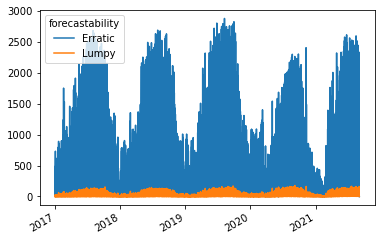

In [106]:
Final_Agg_temp.plot()

In [109]:
Final_result = Forecastability_Analysis(Final_Agg_temp)
Final_result

,stations,ADI,CV2,forecastability
0,Erratic,1.005036,1.400335,Erratic
1,Lumpy,1.073407,1.328034,Erratic


# Final: Try <Nbh,Hour>

In [112]:
df_Nbh_IN.head(
)

,1.0,1.1,2.0,2.1,2.3,2.4,3.0,3.1,3.2,3.3,...,73.1,74.0,74.1,75.0,75.2,77.0,77.1,77.2,77.3,77.4
2017-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:40:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
df_Nbh_IN_temp_Hour = df_Nbh_IN.reset_index()
df_Nbh_IN_temp_Hour.insert(0,'Hour',df_Nbh_IN_temp_Hour['index'].apply(lambda x:datetime.strptime(x.split(':')[0]+':00:00',"%Y-%m-%d %H:%M:%S")))
df_Nbh_IN_temp_Hour = df_Nbh_IN_temp_Hour.set_index('index').groupby('Hour').sum()

In [122]:
df_Nbh_IN_temp_Hour.head()

,1.0,1.1,2.0,2.1,2.3,2.4,3.0,3.1,3.2,3.3,...,73.1,74.0,74.1,75.0,75.2,77.0,77.1,77.2,77.3,77.4
Hour,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-01-01 01:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 02:00:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2017-01-01 03:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-01-01 04:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [123]:
NBH_in_HOUR_result = Forecastability_Analysis(df_Nbh_IN_temp_Hour)

# Final Summary

In [128]:
nbh_in_result.describe()

,ADI,CV2
count,171.000000,171.000000
mean,603.966669,705.757423
std,2072.659288,2420.113054
min,1.469048,1.856164
25%,3.483547,4.474815
50%,15.013945,17.357360
75%,130.266879,158.210263
max,15342.375000,17898.437500


In [130]:
NBH_in_HOUR_result.describe()

,ADI,CV2
count,171.000000,171.000000
mean,105.499651,130.215713
std,352.402712,430.994252
min,1.138778,1.243194
25%,1.578111,2.269564
50%,3.417474,4.552964
75%,28.122684,34.284606
max,2557.125000,2982.312500


In [131]:
COM_in_result.describe()

,ADI,CV2
count,62.000000,62.000000
mean,786.077200,925.211957
std,2753.968651,3267.761067
min,1.219506,1.681463
25%,2.462121,2.957821
50%,24.514568,26.897503
75%,145.317575,174.447503
max,15342.375000,17898.437500


In [132]:
COM_in_HOUR_result.describe()

,ADI,CV2
count,62.000000,62.000000
mean,134.643312,161.189444
std,460.722795,546.920880
min,1.051666,1.306216
25%,1.301908,2.106662
50%,5.043201,5.629485
75%,28.441111,36.289512
max,2557.125000,2982.312500


In [136]:
from functools import reduce

In [138]:
Lst_Res = [nbh_in_result,NBH_in_HOUR_result,COM_in_result,COM_in_HOUR_result]

In [147]:
Lst_Res[0].forecastability.value_counts()

Lumpy    171
Name: forecastability, dtype: int64

In [144]:
Lst_Res[0].describe().T.insert()

,count,mean,std,min,25%,50%,75%,max
ADI,171.0,603.966669,2072.659288,1.469048,3.483547,15.013945,130.266879,15342.3750
CV2,171.0,705.757423,2420.113054,1.856164,4.474815,17.357360,158.210263,17898.4375


In [157]:
Geo_level = ['Nbh','Nbh','Nbh','Nbh','Com','Com','Com','Com']
Time_level = ['10min','10min','1Hour','1Hour','10min','10min','1Hour','1Hour']
res_temp = reduce(lambda a,b:pd.concat([a,b]),[i.describe().T for i in Lst_Res])
res_temp.insert(0,'Time_Agg_level',Time_level)
res_temp.insert(0,'Geo_Agg_level',Geo_level)


In [158]:
res_temp

,Geo_Agg_level,Time_Agg_level,count,mean,std,min,25%,50%,75%,max
ADI,Nbh,10min,171.0,603.966669,2072.659288,1.469048,3.483547,15.013945,130.266879,15342.3750
CV2,Nbh,10min,171.0,705.757423,2420.113054,1.856164,4.474815,17.357360,158.210263,17898.4375
ADI,Nbh,1Hour,171.0,105.499651,352.402712,1.138778,1.578111,3.417474,28.122684,2557.1250
CV2,Nbh,1Hour,171.0,130.215713,430.994252,1.243194,2.269564,4.552964,34.284606,2982.3125
ADI,Com,10min,62.0,786.077200,2753.968651,1.219506,2.462121,24.514568,145.317575,15342.3750
CV2,Com,10min,62.0,925.211957,3267.761067,1.681463,2.957821,26.897503,174.447503,17898.4375
ADI,Com,1Hour,62.0,134.643312,460.722795,1.051666,1.301908,5.043201,28.441111,2557.1250
CV2,Com,1Hour,62.0,161.189444,546.920880,1.306216,2.106662,5.629485,36.289512,2982.3125


### Exportation

In [160]:
df_Nbh_IN_temp_Hour.to_csv('E:\Data\divvy/Nbh_Hour_IN_1721_full.csv')

In [162]:
NBH_in_HOUR_result.to_csv('E:\Data\divvy/Nbh_Hour_IN_1721_result.csv')

In [163]:
#Repeat for OUT data
df_ts_out_1721= pd.read_csv('E:\Data\divvy/df_ts_out_1721_full.csv',parse_dates=['time_stamp'])

In [164]:
df_ts_out_1721_T = df_ts_out_1721.set_index('time_stamp',drop=True).T
df_station = pd.read_csv('E:\Data\divvy/df_station_1721_FINAL.csv',index_col=0)
df_station.set_index('station_name',drop=True,inplace=True)
df_ts_out_1721_T = df_ts_out_1721_T.join(df_station[['Nbh_id']],how='left')
df_Nbh_OUT_temp = df_ts_out_1721_T.groupby('Nbh_id').sum().T

In [189]:
df_Nbh_OUT_temp_Hour = df_Nbh_OUT_temp.reset_index()
df_Nbh_OUT_temp_Hour['index'] = df_Nbh_OUT_temp_Hour['index'].apply(lambda x:str(x))
df_Nbh_OUT_temp_Hour.insert(0,'Hour',df_Nbh_OUT_temp_Hour['index'].apply(lambda x:datetime.strptime(x.split(':')[0]+':00:00',"%Y-%m-%d %H:%M:%S")))
df_Nbh_OUT_temp_Hour = df_Nbh_OUT_temp_Hour.set_index('index').groupby('Hour').sum()

In [191]:
df_Nbh_OUT_temp_Hour.to_csv('E:\Data\divvy/Nbh_Hour_OUT_1721_full.csv')

In [195]:
NBH_OUT_HOUR_result = Forecastability_Analysis(df_Nbh_OUT_temp_Hour)

In [196]:
NBH_OUT_HOUR_result.forecastability.value_counts()

Lumpy      154
Erratic     17
Name: forecastability, dtype: int64

In [197]:
NBH_OUT_HOUR_result.to_csv('E:\Data\divvy/Nbh_Hour_OUT_1721_result.csv')